In [3]:
# Import the Necessary Modules

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
# Generate synthetic data                        # فيتشرين تؤثر على التصنيف
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, # لاتوجد فيتشر مكررة أو زائدة عن الحاجة
                           n_clusters_per_class=1, n_classes=3, random_state=42) # كلستر واحد لكل كلاس 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # تقسيم البيانات
print(y)

[2 2 2 1 2 2 1 0 0 2 2 2 0 2 2 2 2 1 2 1 0 0 2 1 2 0 2 1 2 1 0 1 2 1 0 0 2
 1 1 0 1 1 1 1 1 1 2 1 0 0 1 2 1 0 0 2 2 0 0 0 0 1 2 1 0 2 1 1 1 2 2 0 2 2
 0 1 1 0 1 2 1 2 1 0 0 1 2 2 2 0 0 1 2 0 0 0 1 0 1 2 1 0 0 1 1 2 1 2 2 2 0
 2 2 1 0 0 0 1 0 1 1 0 1 2 0 0 1 2 2 1 0 1 0 0 2 1 1 1 1 0 1 1 2 2 1 0 2 2
 0 2 0 1 1 0 0 1 2 2 0 0 1 1 1 0 0 1 1 2 1 1 1 0 0 1 1 0 2 1 1 2 1 1 2 1 2
 0 1 1 2 2 0 0 2 2 0 0 2 2 2 2 0 1 2 0 0 2 1 1 1 1 1 0 2 0 2 2 0 1 0 1 2 1
 0 1 0 0 2 1 2 2 2 0 0 1 0 2 0 0 2 0 1 1 2 2 1 2 0 0 1 0 0 1 1 0 1 2 1 1 0
 1 0 0 1 2 2 1 2 1 0 0 2 0 2 2 1 2 1 2 2 1 2 1 1 1 0 1 0 1 0 2 2 1 1 1 1 1
 0 0 0 0 1 0 2 2 2 2 0 1 2 0 2 1 2 0 1 2 1 1 2 2 1 1 0 2 0 2 1 2 0 0 0 2 2
 2 0 0 0 0 1 1 0 0 1 1 2 1 1 0 1 2 2 1 2 2 0 2 2 2 2 0 0 1 0 2 0 1 1 2 1 2
 2 0 0 2 0 1 2 0 0 2 0 1 0 2 2 0 2 1 0 2 1 2 0 0 1 2 2 0 1 1 1 0 0 1 0 1 0
 1 0 1 0 1 0 1 2 2 2 2 0 1 0 2 1 2 0 2 1 0 2 1 2 0 1 1 2 0 0 1 1 2 0 0 2 0
 0 0 0 0 0 0 1 1 2 1 1 0 1 0 0 1 0 0 0 2 0 2 0 1 1 2 2 2 0 2 0 2 2 0 2 2 0
 2 0 0 1 0 0 0 2 2 1 2 0 

In [5]:
# Initialize and train the LDA model
lda = LinearDiscriminantAnalysis() # اهيئة او استدعاء الموديل
lda.fit(X_train, y_train) # تدريب النموذج
y_pred_lda = lda.predict(X_test) # توقع قيمة التيست

print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda)) # 
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lda))
print("Classification Report:\n", classification_report(y_test, y_pred_lda))

LDA Accuracy: 0.8266666666666667
Confusion Matrix:
 [[ 75   4  22]
 [ 16  71   0]
 [  0  10 102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.74      0.78       101
           1       0.84      0.82      0.83        87
           2       0.82      0.91      0.86       112

    accuracy                           0.83       300
   macro avg       0.83      0.82      0.82       300
weighted avg       0.83      0.83      0.83       300



In [6]:
# Initialize and train the QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Make predictions
y_pred_qda = qda.predict(X_test)

# Evaluate the model
print("QDA Accuracy:", accuracy_score(y_test, y_pred_qda))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_qda))
print("Classification Report:\n", classification_report(y_test, y_pred_qda))

QDA Accuracy: 0.93
Confusion Matrix:
 [[ 96   2   3]
 [ 10  77   0]
 [  4   2 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       101
           1       0.95      0.89      0.92        87
           2       0.97      0.95      0.96       112

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



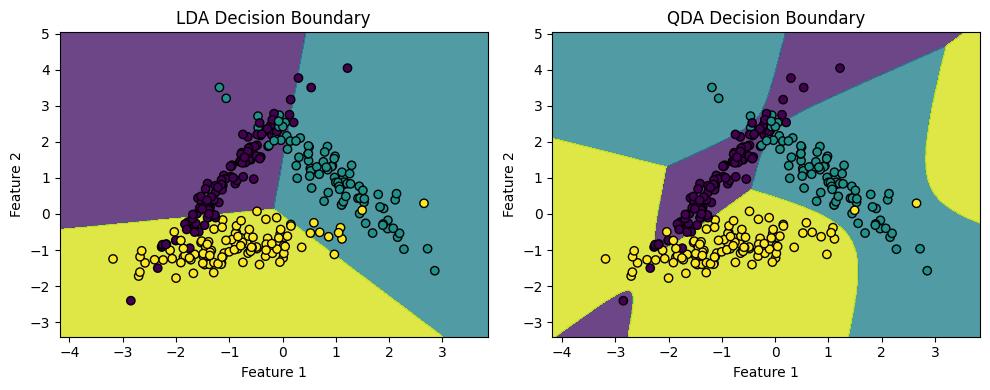

In [7]:
def plot_decision_boundaries(X, y, model, title, subplot_index): # تعريف الدالة
    plt.subplot(subplot_index) # إنشاء منطقة للفيزولايويشن
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # حدود محور x
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # حدود محور y
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), 
                         np.arange(y_min, y_max, 0.01)) #  إنشاء شبكة بناء على بيانات المصفوفة
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # توقع النموذج
    Z = Z.reshape(xx.shape) #   إعادة تشكيل المصفوفة حسب التنبؤ
    plt.contourf(xx, yy, Z, alpha=0.8) # رسم حدود
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o') #  رسم نقاط
    plt.title(title) # وضع عنوان
    plt.xlabel('Feature 1') 
    plt.ylabel('Feature 2')


plt.figure(figsize=(10, 4)) # تهيئة الفيقر
# Plot decision boundaries for LDA
plot_decision_boundaries(X_test, y_test, lda, "LDA Decision Boundary", 121)

# Plot decision boundaries for QDA
plot_decision_boundaries(X_test, y_test, qda, "QDA Decision Boundary", 122)

plt.tight_layout() # ترتيب التخطيط بمعنى ضبط المسافات بين الرسومات لتجنب تداخل العناوين أو التسميات مع الرسوم
plt.show()